# đọc file 

In [1]:
import pandas as pd

# Load the dataset to see its contents
file_path = './dulieu.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure and the type of data it contains
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   2800 non-null   int64         
 1   time         2800 non-null   datetime64[ns]
 2   open         2800 non-null   int64         
 3   high         2800 non-null   int64         
 4   low          2800 non-null   int64         
 5   close        2800 non-null   int64         
 6   volume       2800 non-null   int64         
 7   MA50         2800 non-null   float64       
 8   MA200        2800 non-null   float64       
 9   sup          2794 non-null   float64       
 10  Buy_signal   2800 non-null   int64         
 11  Sell_signal  2800 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 262.6 KB


(   Unnamed: 0       time   open   high    low  close   volume          MA50  \
 0           0 2013-01-02  19640  19790  19590  19790    90770  19790.000000   
 1           1 2013-01-03  19790  20040  19690  19790  1618510  19790.000000   
 2           2 2013-01-04  20150  20400  19790  20250  1318980  19943.333333   
 3           3 2013-01-07  20400  20450  20250  20250   701600  20020.000000   
 4           4 2013-01-08  20190  21010  20100  20700   871680  20156.000000   
 
           MA200  sup  Buy_signal  Sell_signal  
 0  19790.000000  0.0           0            0  
 1  19790.000000  NaN           0            0  
 2  19943.333333  NaN           0            0  
 3  20020.000000  NaN           0            0  
 4  20156.000000  NaN           0            0  ,
 None)

# xử lý những giá trị còn thiếu trước

In [2]:
# Điền các giá trị thiếu trong cột 'sup' bằng mean
data['sup'].fillna(data['sup'].mean(), inplace=True)

# Kiểm tra lại các giá trị còn thiếu
missing_values_after_filling = data.isnull().sum()

missing_values_after_filling


Unnamed: 0     0
time           0
open           0
high           0
low            0
close          0
volume         0
MA50           0
MA200          0
sup            0
Buy_signal     0
Sell_signal    0
dtype: int64

In [3]:
data
#Daily_Change (sự thay đổi hàng ngày giữa giá đóng cửa và giá mở cửa)
#Intraday_Range (khoảng biến động trong ngày từ giá cao nhất tới giá thấp nhất) 

,Unnamed: 0,time,open,high,low,close,volume,MA50,MA200,sup,Buy_signal,Sell_signal
0,0,2013-01-02,19640,19790,19590,19790,90770,19790.000000,19790.000000,0.000000,0,0
1,1,2013-01-03,19790,20040,19690,19790,1618510,19790.000000,19790.000000,57861.749067,0,0
2,2,2013-01-04,20150,20400,19790,20250,1318980,19943.333333,19943.333333,57861.749067,0,0
3,3,2013-01-07,20400,20450,20250,20250,701600,20020.000000,20020.000000,57861.749067,0,0
4,4,2013-01-08,20190,21010,20100,20700,871680,20156.000000,20156.000000,57861.749067,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2795,2795,2024-03-19,81000,81000,79700,79700,950400,77118.000000,79511.950000,76936.704616,0,0
2796,2796,2024-03-20,80000,81200,79600,81000,1462300,77218.000000,79547.000000,76936.704616,0,0
2797,2797,2024-03-21,81900,81900,80500,81000,938700,77304.000000,79574.000000,76936.704616,0,0
2798,2798,2024-03-22,81000,81500,80400,80500,1235000,77370.000000,79594.100000,76936.704616,0,0


# tiền xử lý dữ liệu

In [4]:
from sklearn.preprocessing import StandardScaler

# 1. Loại bỏ cột không cần thiết
data = data.drop(columns=['Unnamed: 0'])

# 2. Tạo đặc trưng mới
data['Daily_Change'] = data['close'] - data['open']
data['Intraday_Range'] = data['high'] - data['low']

# 3. Chuẩn hóa dữ liệu
# Chọn các cột cần chuẩn hóa
columns_to_scale = ['open', 'high', 'low', 'close', 'volume']
scaler = StandardScaler()

# Chuẩn hóa các cột đã chọn
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Hiển thị một số hàng đầu tiên của dữ liệu sau khi tiền xử lý
data.head()


,time,open,high,low,close,volume,MA50,MA200,sup,Buy_signal,Sell_signal,Daily_Change,Intraday_Range
0,2013-01-02,-1.832607,-1.834776,-1.826453,-1.825338,-1.131530,19790.000000,19790.000000,0.000000,0,0,150,200
1,2013-01-03,-1.825398,-1.822940,-1.821570,-1.825338,2.163682,19790.000000,19790.000000,57861.749067,0,0,0,350
2,2013-01-04,-1.808097,-1.805896,-1.816688,-1.803199,1.517620,19943.333333,19943.333333,57861.749067,0,0,100,610
3,2013-01-07,-1.796082,-1.803529,-1.794231,-1.803199,0.185981,20020.000000,20020.000000,57861.749067,0,0,-150,200
4,2013-01-08,-1.806174,-1.777015,-1.801554,-1.781541,0.552830,20156.000000,20156.000000,57861.749067,0,0,510,910


In [27]:
# Thống kê mô tả để tính toán: trung bình, trung vị, độ lệch chuẩn, phân phối
# Phân tích tương quan để Kiểm tra tương quan giữa các cột để xác định mối quan hệ

In [5]:
# thống kê mô tả
descriptive_statistics = data.describe()

# ma trận tương quan
correlation_matrix = data.corr()


In [6]:
descriptive_statistics
# giá trị trung bình gần 0 và độ lệch chuẩn gần 1

,time,open,high,low,close,volume,MA50,MA200,sup,Buy_signal,Sell_signal,Daily_Change,Intraday_Range
count,2800,2800.000000,2800.000000,2800.000000,2.800000e+03,2.800000e+03,2800.00000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,2018-08-17 15:54:00,0.000000,0.000000,0.000000,-8.120488e-17,1.116567e-16,57213.62448,55744.291734,57861.749067,0.012857,0.012857,-55.683571,1542.180000
min,2013-01-02 00:00:00,-1.941222,-1.932781,-1.942647,-1.944216e+00,-1.260751e+00,19790.00000,19790.000000,0.000000,0.000000,0.000000,-6900.000000,0.000000
25%,2015-10-29 18:00:00,-0.961287,-0.957945,-0.956948,-9.599872e-01,-6.881000e-01,37667.58500,37717.075000,38247.325359,0.000000,0.000000,-580.000000,790.000000
50%,2018-08-18 12:00:00,0.098426,0.102111,0.084408,1.012473e-01,-2.392559e-01,59823.02000,56097.460000,60375.413709,0.000000,0.000000,0.000000,1200.000000
75%,2021-06-08 06:00:00,0.860891,0.845547,0.872992,8.568655e-01,3.785398e-01,75226.00000,71702.202500,76397.042571,0.000000,0.000000,470.000000,1912.500000
max,2024-03-25 00:00:00,2.152492,2.195237,2.120738,2.271363e+00,8.412903e+00,89808.20000,88514.550000,109698.097222,1.000000,1.000000,9250.000000,9630.000000
std,NaN,1.000179,1.000179,1.000179,1.000179e+00,1.000179e+00,20613.79648,20078.883386,21237.539350,0.112678,0.112678,1230.926113,1193.422046


In [7]:
correlation_matrix

,time,open,high,low,close,volume,MA50,MA200,sup,Buy_signal,Sell_signal,Daily_Change,Intraday_Range
time,1.000000,0.815247,0.812548,0.817356,0.814640,0.217430,0.832515,0.874904,0.814658,0.014199,0.008864,-0.029997,0.352318
open,0.815247,1.000000,0.999125,0.999206,0.998249,0.157285,0.968951,0.893353,0.973094,0.003918,0.021390,-0.053789,0.533337
high,0.812548,0.999125,1.000000,0.998826,0.999196,0.171069,0.968678,0.891296,0.972908,0.009615,0.019611,-0.023014,0.555349
low,0.817356,0.999206,0.998826,1.000000,0.999039,0.151244,0.968447,0.894414,0.972396,0.006898,0.014114,-0.027034,0.514409
close,0.814640,0.998249,0.999196,0.999039,1.000000,0.163669,0.967797,0.891817,0.971507,0.013024,0.011307,0.005366,0.537460
volume,0.217430,0.157285,0.171069,0.151244,0.163669,1.000000,0.107740,0.081002,0.116429,0.136292,0.048517,0.103972,0.431875
MA50,0.832515,0.968951,0.968678,0.968447,0.967797,0.107740,1.000000,0.940762,0.982655,0.006554,0.020779,-0.042960,0.522387
MA200,0.874904,0.893353,0.891296,0.894414,0.891817,0.081002,0.940762,1.000000,0.909775,0.009716,0.009450,-0.047580,0.423492
sup,0.814658,0.973094,0.972908,0.972396,0.971507,0.116429,0.982655,0.909775,1.000000,-0.019463,0.048590,-0.050365,0.529484
Buy_signal,0.014199,0.003918,0.009615,0.006898,0.013024,0.136292,0.006554,0.009716,-0.019463,1.000000,-0.013025,0.153637,0.051786


In [8]:
# Các cột open, high, low, close có tương quan cao với nhau tới giá cả trong cùng một phiên giao dịch.
# MA50 và MA200 (trung bình động 50 và 200 ngày) cũng có tương quan cao với nhau và với các cột giá (open, high, low, close), cho thấy xu hướng giá cả có ảnh hưởng đáng kể tới các chỉ số trung bình động.
# sup (là một loại chỉ báo hỗ trợ) có mối tương quan cao với MA50 và MA200, cũng như với open, high, low, và close.
# Daily_Change và Intraday_Range cho thấy mức độ biến động của thị trường nhưng không có tương quan cao với các chỉ báo khác như MA50 hoặc MA200.
# Buy_signal và Sell_signal có tương quan nhất định với volume và Daily_Change, có thể phản ánh mối quan hệ giữa khối lượng giao dịch và các quyết định mua hoặc bán.

# Trực quan hóa dữ liệu

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


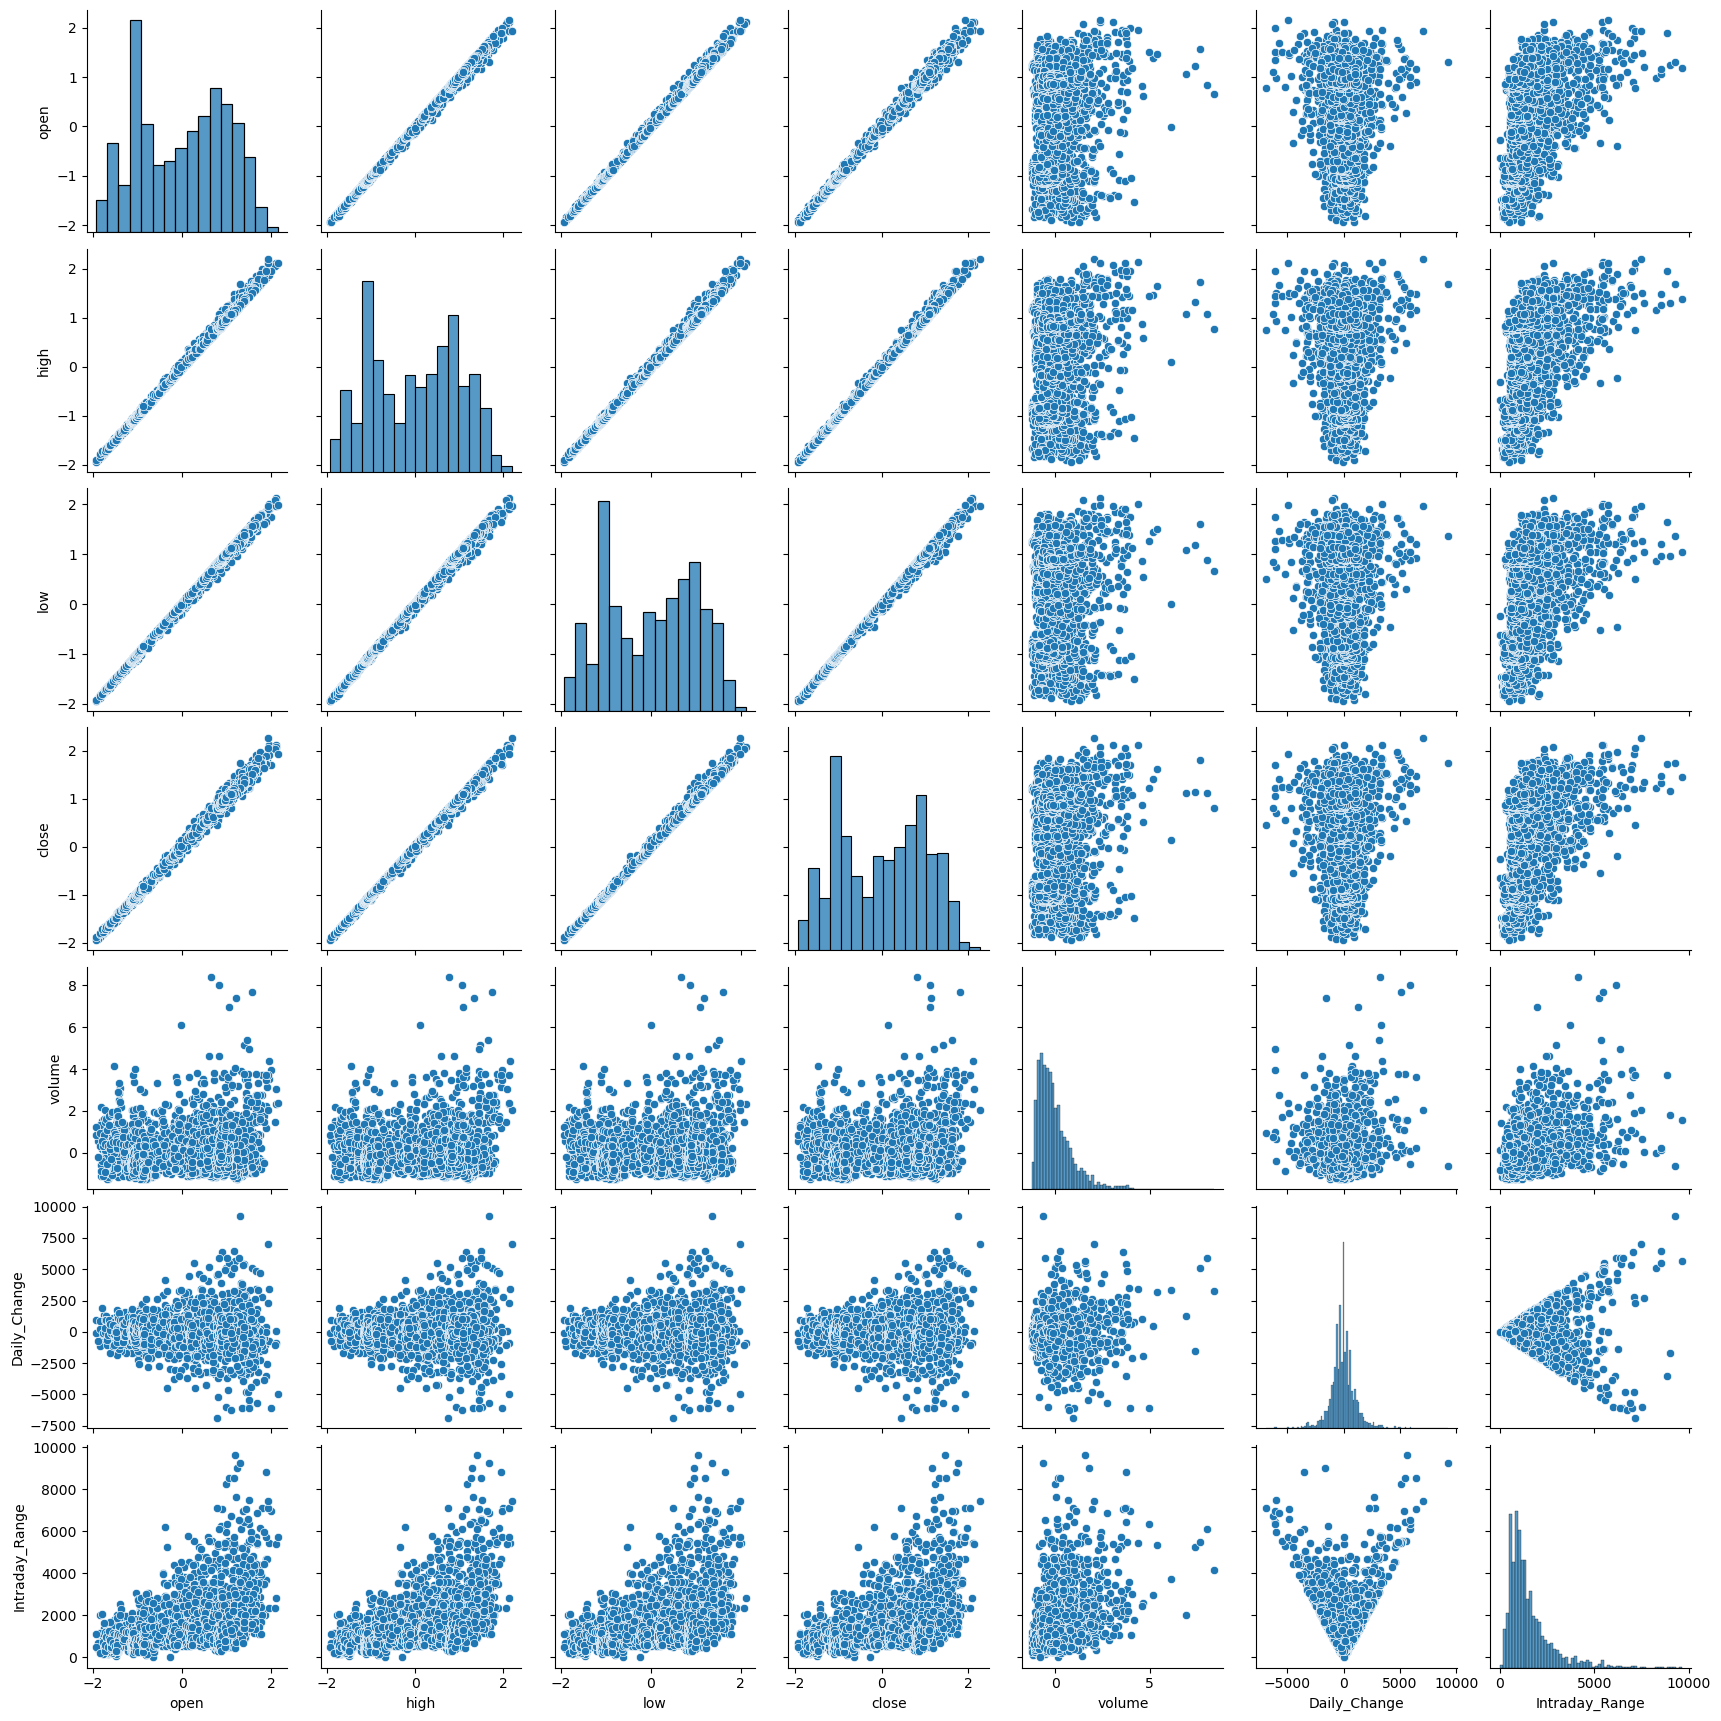

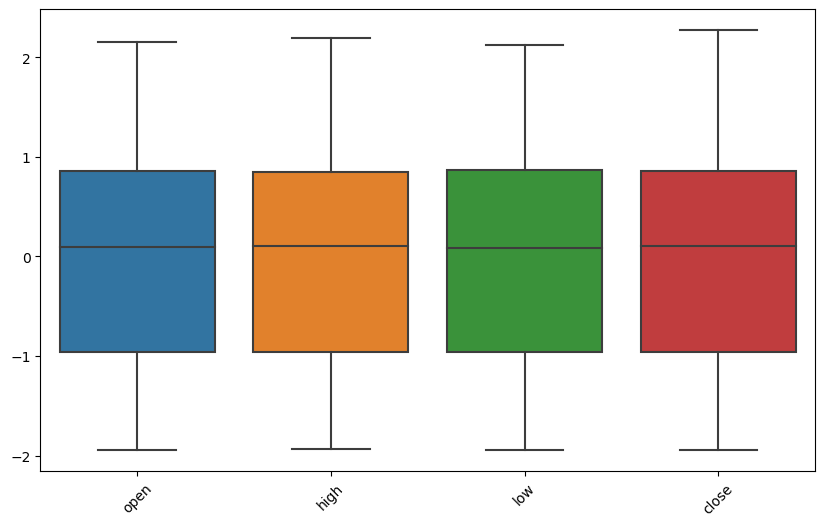

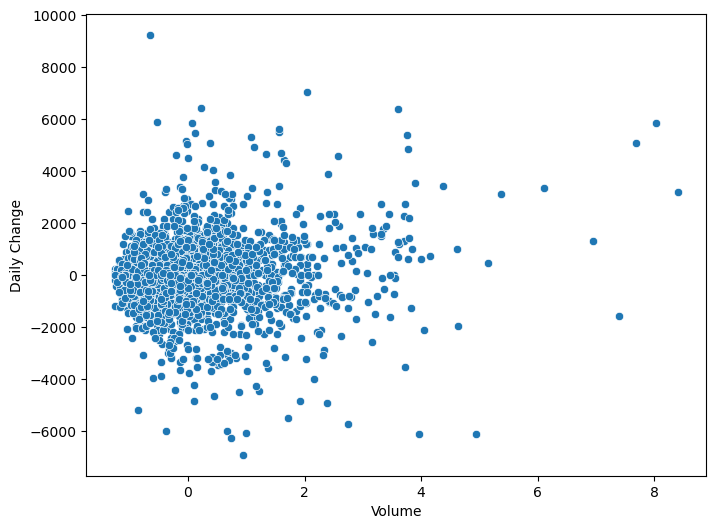

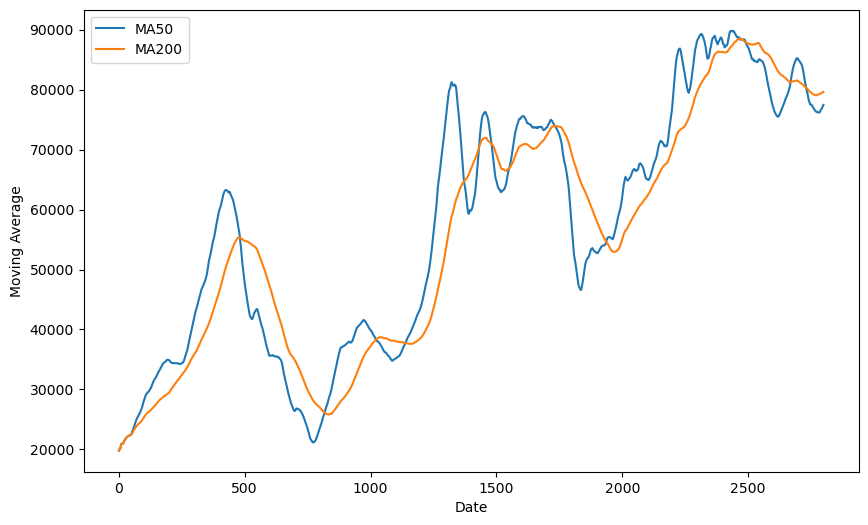

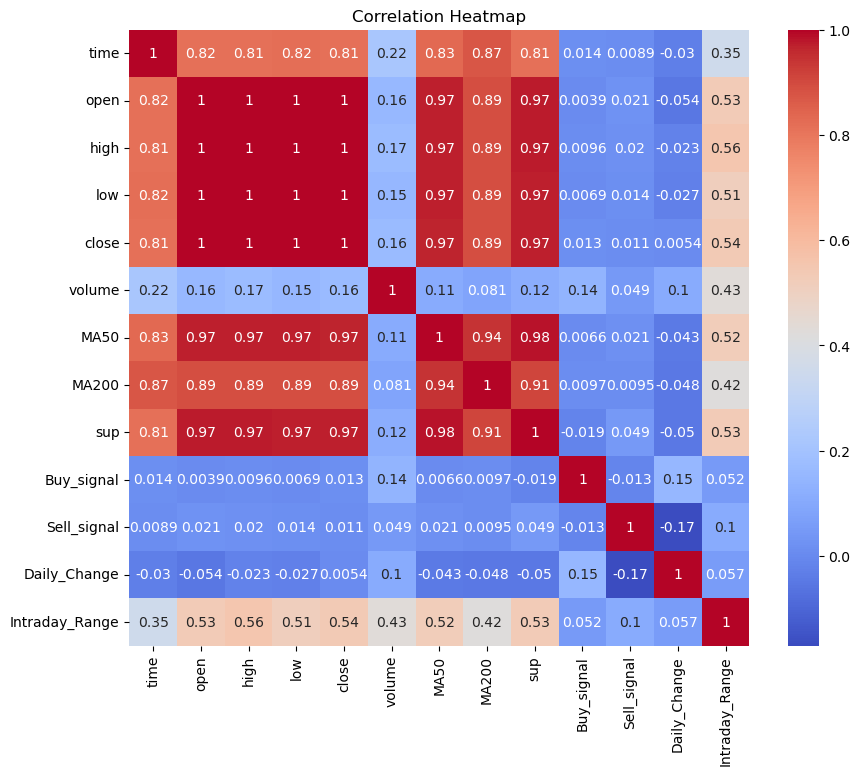

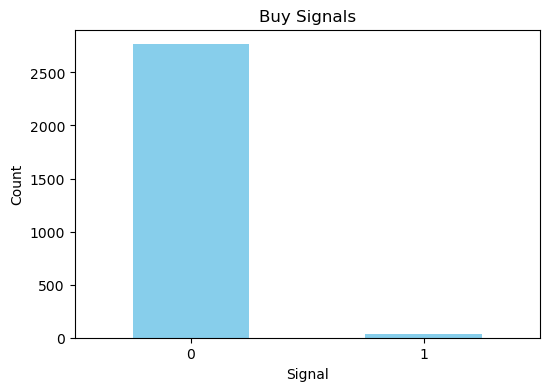

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Biểu đồ phân phối
sns.pairplot(data[['open', 'high', 'low', 'close', 'volume', 'Daily_Change', 'Intraday_Range']])
plt.show()

# Biểu đồ Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['open', 'high', 'low', 'close']])
plt.xticks(rotation=45)
plt.show()

# Biểu đồ Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='volume', y='Daily_Change', data=data)
plt.xlabel('Volume')
plt.ylabel('Daily Change')
plt.show()

# Biểu đồ Line
plt.figure(figsize=(10, 6))
plt.plot(data['MA50'], label='MA50')
plt.plot(data['MA200'], label='MA200')
plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.legend()
plt.show()

# Biểu đồ Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Biểu đồ Bar
plt.figure(figsize=(6, 4))
data['Buy_signal'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Buy Signals')
plt.xlabel('Signal')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


# Xây dựng mô hình dự đoán xu hướng tăng/ giảm bằng LSTM

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Chia dữ liệu thành features và target
X = data[['open', 'high', 'low', 'close', 'volume', 'MA50', 'MA200', 'sup', 'Daily_Change', 'Intraday_Range']]
y = data['Buy_signal']  # Target

# Chia dữ liệu thành tập huấn luyện và kiểm tra (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Reshape features để phù hợp với đầu vào của mô hình LSTM (số lượng mẫu, số lượng bước thời gian, số lượng đặc trưng)
X_train = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# Compile mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Đánh giá mô hình trên tập kiểm tra
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


Epoch 1/50


C:\Users\Acer\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2213 - loss: 0.8787 - val_accuracy: 0.9536 - val_loss: 0.5248
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9643 - loss: 0.4708 - val_accuracy: 0.9911 - val_loss: 0.3166
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9854 - loss: 0.3003 - val_accuracy: 0.9911 - val_loss: 0.2305
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9872 - loss: 0.2224 - val_accuracy: 0.9911 - val_loss: 0.1772
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9893 - loss: 0.1721 - val_accuracy: 0.9911 - val_loss: 0.1428
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9893 - loss: 0.1418 - val_accuracy: 0.9911 - val_loss: 0.1198
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9857 - loss: 0.1300 - val_accuracy: 0.9911 - val_loss: 0.1038
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9889 - loss: 0.1085 - val_accuracy: 0.9911 - val_loss: 0.0923
Epo

In [11]:
# Dự đoán xác suất của các lớp trên dữ liệu kiểm tra
predicted_probabilities = model.predict(X_test)

# Áp dụng ngưỡng 0.5 để quyết định lớp cuối cùng
predictions = (predicted_probabilities > 0.5).astype(int)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


      Thực tế   Dự đoán
0    0.013839  0.015454
1    0.013839  0.015454
2    0.013839  0.015454
3    0.013839  0.015454
4    0.013839  0.015454
..        ...       ...
555  0.013839  0.015454
556  0.013839  0.015454
557  0.013839  0.015454
558  0.013839  0.015454
559  0.013839  0.015454

[560 rows x 2 columns]


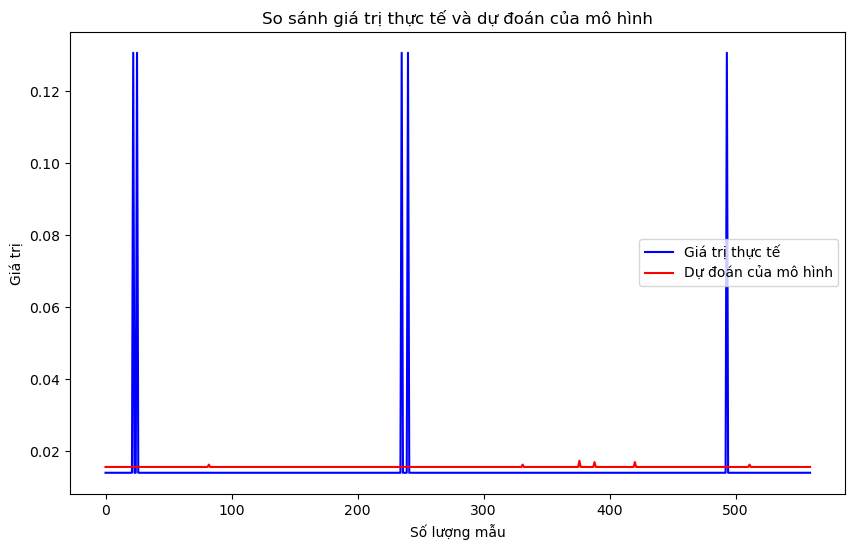

In [23]:
import matplotlib.pyplot as plt

# Chuyển đổi dữ liệu thực tế về đơn vị thực
y_test_actual = y_scaler.inverse_transform(y_test.values.reshape(-1, 1))

# Tạo DataFrame để hiển thị dữ liệu thực tế và dự đoán
comparison_df = pd.DataFrame({'Thực tế': y_test_actual.flatten(), 'Dự đoán': y_test_predict_actual.flatten()})

# In ra tập dữ liệu so sánh
print(comparison_df)

# Vẽ biểu đồ so sánh giá trị thực tế và dự đoán
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Giá trị thực tế', color='blue')
plt.plot(y_test_predict_actual, label='Dự đoán của mô hình', color='red')
plt.title('So sánh giá trị thực tế và dự đoán của mô hình')
plt.xlabel('Số lượng mẫu')
plt.ylabel('Giá trị')
plt.legend()
plt.show()


# Xây dựng model dự đoán giá mở cửa/ đóng cửa

In [35]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Chia dữ liệu thành features và target
X_open = data[['high', 'low', 'close', 'volume', 'MA50', 'MA200', 'sup', 'Daily_Change', 'Intraday_Range']]
y_open = data['open']  # Target là giá mở cửa

X_close = data[['open', 'high', 'low', 'volume', 'MA50', 'MA200', 'sup', 'Daily_Change', 'Intraday_Range']]
y_close = data['close']  # Target là giá đóng cửa

# Chia dữ liệu thành tập huấn luyện và kiểm tra (80% - 20%)
X_train_open, X_test_open, y_train_open, y_test_open = train_test_split(X_open, y_open, test_size=0.2, random_state=42)
X_train_close, X_test_close, y_train_close, y_test_close = train_test_split(X_close, y_close, test_size=0.2, random_state=42)

# # Reshape features để phù hợp với đầu vào của mô hình LSTM (số lượng mẫu, số lượng bước thời gian, số lượng đặc trưng)
# X_train_open = np.array(X_train_open).reshape((X_train_open.shape[0], 1, X_train_open.shape[1]))
# X_test_open = np.array(X_test_open).reshape((X_test_open.shape[0], 1, X_test_open.shape[1]))

# X_train_close = np.array(X_train_close).reshape((X_train_close.shape[0], 1, X_train_close.shape[1]))
# X_test_close = np.array(X_test_close).reshape((X_test_close.shape[0], 1, X_test_close.shape[1]))
# Reshape features để phù hợp với đầu vào của mô hình LSTM (số lượng mẫu, số lượng bước thời gian, số lượng đặc trưng)
X_train_open = np.array(X_train_open).reshape((X_train_open.shape[0], X_train_open.shape[1], 1))
X_test_open = np.array(X_test_open).reshape((X_test_open.shape[0], X_test_open.shape[1], 1))

X_train_close = np.array(X_train_close).reshape((X_train_close.shape[0], X_train_close.shape[1], 1))
X_test_close = np.array(X_test_close).reshape((X_test_close.shape[0], X_test_close.shape[1], 1))

# Xây dựng mô hình LSTM cho giá mở cửa
model_open = Sequential()
model_open.add(LSTM(50, input_shape=(X_train_open.shape[1], X_train_open.shape[2])))
model_open.add(Dense(1))

# Compile mô hình
model_open.compile(optimizer='adam', loss='mse')

# Huấn luyện mô hình cho giá mở cửa
history_open = model_open.fit(X_train_open, y_train_open, epochs=50, batch_size=32, validation_data=(X_test_open, y_test_open), verbose=1)

# Xây dựng mô hình LSTM cho giá đóng cửa
model_close = Sequential()
model_close.add(LSTM(50, input_shape=(X_train_close.shape[1], X_train_close.shape[2])))
model_close.add(Dense(1))

# Compile mô hình
model_close.compile(optimizer='adam', loss='mse')

# Huấn luyện mô hình cho giá đóng cửa
history_close = model_close.fit(X_train_close, y_train_close, epochs=50, batch_size=32, validation_data=(X_test_close, y_test_close), verbose=1)


Epoch 1/50


C:\Users\Acer\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9459 - val_loss: 0.4938
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4302 - val_loss: 0.2918
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2041 - val_loss: 0.2948
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2142 - val_loss: 0.1256
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0878 - val_loss: 0.1138
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1554 - val_loss: 0.0761
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0690 - val_loss: 0.0606
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0663 - val_loss: 0.1043
Epoch 9/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1018 - val_loss: 0.0994
Epoch 10/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0681 - val_loss: 0.0565
Epoch 11/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0485 - val_loss: 0.0595
Epoch 12/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0420 - val_loss: 0.1765


C:\Users\Acer\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0198 - val_loss: 0.4491
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4309 - val_loss: 0.3311
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2659 - val_loss: 0.2361
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2119 - val_loss: 0.1583
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1427 - val_loss: 0.0960
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0890 - val_loss: 0.1394
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0913 - val_loss: 0.1001
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0592 - val_loss: 0.0277
Epoch 9/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0362 - val_loss: 0.0330
Epoch 10/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0275 - val_loss: 0.0262
Epoch 11/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0260 - val_loss: 0.0286
Epoch 12/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0251 - val_loss: 0.0165


# đánh giá mô hình dự đoán giá mở cửa và giá đóng cửa:

In [36]:
from sklearn.metrics import mean_squared_error

# Dự đoán giá mở cửa trên tập kiểm tra
y_pred_open = model_open.predict(X_test_open)

# Dự đoán giá đóng cửa trên tập kiểm tra
y_pred_close = model_close.predict(X_test_close)

# Tính MSE cho giá mở cửa và giá đóng cửa
mse_open = mean_squared_error(y_test_open, y_pred_open)
mse_close = mean_squared_error(y_test_close, y_pred_close)

print(f'MSE dự đoán giá mở cửa: {mse_open}')
print(f'MSE dự đoán giá đóng cửa: {mse_close}')


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
MSE dự đoán giá mở cửa: 0.03551788775158442
MSE dự đoán giá đóng cửa: 0.010196255086501868


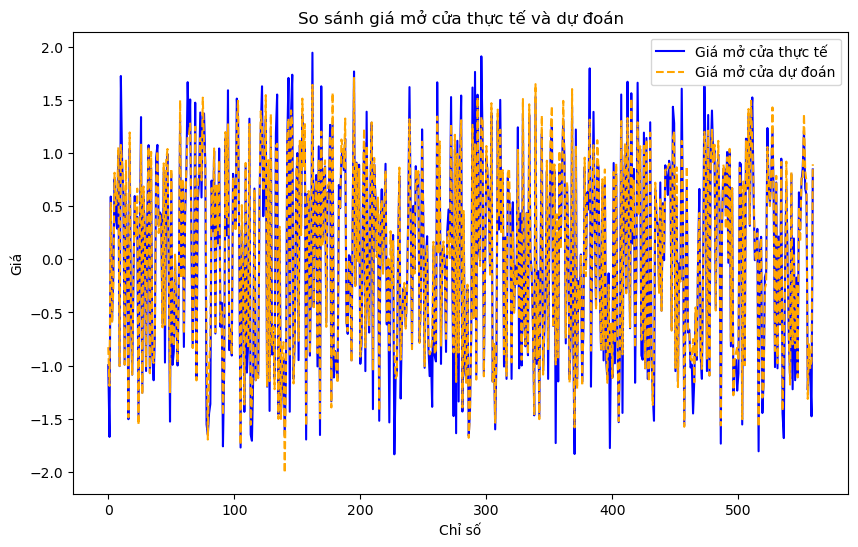

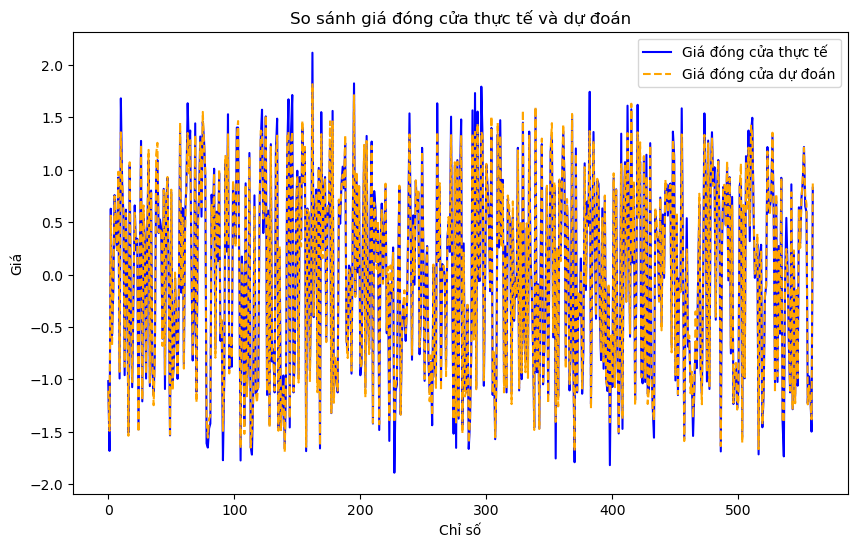

In [37]:
import matplotlib.pyplot as plt

# Biểu đồ so sánh giá mở cửa thực tế và dự đoán
plt.figure(figsize=(10, 6))
plt.plot(y_test_open.values, label='Giá mở cửa thực tế', color='blue')
plt.plot(y_pred_open, label='Giá mở cửa dự đoán', linestyle='--', color='orange')
plt.title('So sánh giá mở cửa thực tế và dự đoán')
plt.xlabel('Chỉ số')
plt.ylabel('Giá')
plt.legend()
plt.show()

# Biểu đồ so sánh giá đóng cửa thực tế và dự đoán
plt.figure(figsize=(10, 6))
plt.plot(y_test_close.values, label='Giá đóng cửa thực tế', color='blue')
plt.plot(y_pred_close, label='Giá đóng cửa dự đoán', linestyle='--', color='orange')
plt.title('So sánh giá đóng cửa thực tế và dự đoán')
plt.xlabel('Chỉ số')
plt.ylabel('Giá')
plt.legend()
plt.show()


In [39]:
# Hiển thị toàn bộ tập dữ liệu
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data)


           time      open      high       low     close    volume  \
0    2013-01-02 -1.832607 -1.834776 -1.826453 -1.825338 -1.131530   
1    2013-01-03 -1.825398 -1.822940 -1.821570 -1.825338  2.163682   
2    2013-01-04 -1.808097 -1.805896 -1.816688 -1.803199  1.517620   
3    2013-01-07 -1.796082 -1.803529 -1.794231 -1.803199  0.185981   
4    2013-01-08 -1.806174 -1.777015 -1.801554 -1.781541  0.552830   
5    2013-01-09 -1.771572 -1.769914 -1.794231 -1.798386  1.245222   
6    2013-01-10 -1.798485 -1.791692 -1.794231 -1.781541 -0.710413   
7    2013-01-11 -1.776378 -1.743400 -1.766891 -1.732450  0.850420   
8    2013-01-14 -1.732643 -1.693215 -1.724905 -1.698279 -0.238523   
9    2013-01-15 -1.698521 -1.709785 -1.715140 -1.720418 -0.299714   
10   2013-01-16 -1.723031 -1.707892 -1.712699 -1.710793  2.037804   
11   2013-01-17 -1.711017 -1.719254 -1.741992 -1.751702 -0.237401   
12   2013-01-18 -1.751867 -1.750502 -1.754197 -1.761809 -0.140922   
13   2013-01-21 -1.756673 -1.76707

In [42]:
# Reshape features để phù hợp với đầu vào của mô hình LSTM (số lượng mẫu, số lượng bước thời gian, số lượng đặc trưng)
X_open_reshaped = np.array(X_open).reshape((X_open.shape[0], 1, X_open.shape[1]))
X_close_reshaped = np.array(X_close).reshape((X_close.shape[0], 1, X_close.shape[1]))

# Dự đoán giá mở cửa và đóng cửa trên toàn bộ tập dữ liệu đã reshape
y_pred_open_all = model_open.predict(X_open_reshaped)
y_pred_close_all = model_close.predict(X_close_reshaped)

# Thêm hai cột dự đoán vào DataFrame
data['Predicted_Open'] = y_pred_open_all
data['Predicted_Close'] = y_pred_close_all

# Hiển thị toàn bộ tập dữ liệu với cột dự đoán mới
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data)


InvalidArgumentError: Graph execution error:

Detected at node sequential_3_1/lstm_3_1/while/body/_1/sequential_3_1/lstm_3_1/while/lstm_cell_1/MatMul defined at (most recent call last):
<stack traces unavailable>
Matrix size-incompatible: In[0]: [32,9], In[1]: [1,200]
	 [[{{node sequential_3_1/lstm_3_1/while/body/_1/sequential_3_1/lstm_3_1/while/lstm_cell_1/MatMul}}]] [Op:__inference_one_step_on_data_distributed_51130]